<a href="https://colab.research.google.com/github/Mohadese-ghayoomi/EulerProjectSolution/blob/master/Elearning_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Import Libraries**

In [1]:
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
print('Version is',tf.__version__)


Version is 2.2.0-rc3


# **Data Preprocessing**

**importing the Dataset** 

In [2]:
from google.colab import drive; drive.mount('/content/drive')
os.getcwd()
%cd /content/drive/My Drive/Colab Notebooks
from datasets import MNISTDataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


**Splitting the datasets into the Training set and Test set**


In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)
def plot_history(net_history):
  history = net_history.history
  losses = history['loss']
  val_losses = history['val_loss']
  accuracies = history['accuracy']
  val_accuracies = history['val_accuracy']

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(losses)
  plt.plot(val_losses)
  plt.legend(['loss','val_loss'])
  
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(accuracies)
  plt.plot(val_accuracies)
  plt.legend(['accuracy','val_accuracy'])

(60000, 28, 28) (60000,)


# **Assign Class name to data**

In [0]:
class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five',
               'Six', 'Seven', 'eight', 'nine', 'ten']

# **Preprocess the Data**

(60000, 28, 28)
(60000,)
10000


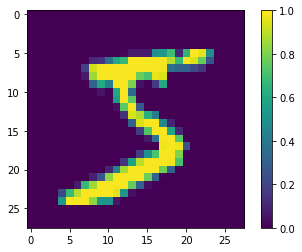

In [41]:
# The Pixel values in Range 0 to 255
print(train_images.shape)
print(train_labels.shape)
print(len(test_images))
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()


# **Convert the range of numbers between 0 and 1 before feeding to the network**

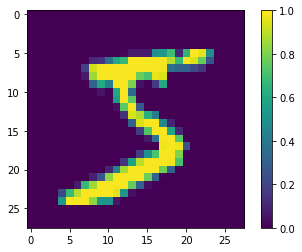

In [6]:
#Divided the Values by 255
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

# **Building the ANN**

**Initialising the ANN**

In [0]:
# create an object of the sequential class(sequential class which creates a new ANN as a sequence of layers)
ann =tf.keras.models.Sequential()

**Adding the input layer and first hidden layer**

In [0]:
#only reformats the Data (two dimensional array to one)
ann.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#Dense class create the fully connection between the input layer and first hidden layer
#rectify activation function is the activation function for fully connection between input layer and the first layer 
ann.add(tf.keras.layers.Dense(units = 500, activation='relu' ))
#to reduce from overfitting
ann.add(tf.keras.layers.Dropout(0.2))

**Adding second hidden layer**

In [0]:
#second layer connected automatically to first layer 
ann.add(tf.keras.layers.Dense(units = 100, activation='relu' ))
ann.add(tf.keras.layers.Dropout(0.2))

**Adding the output Layer**

In [10]:
# more than 2 categories at the end, so we should softmax
ann.add(tf.keras.layers.Dense(units = 10, activation='softmax'))
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
__________________________________________________

# **Training the ANN**

**Compiling the ANN**

In [0]:
# Adding a few setting during the model compile step 
#1.Loss function(measure the accuracy of the model, it has to minimize )
#2.Optimizer(Updating the model on the basis of observed data and the loss function)
#3.Metrics(monitor the training and testing steps)
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the ANN model on the Training set**

In [12]:
# train_lable is the dependent variable vectore of the training set 
# train_image is the matrix of features the training set 
# over each epoch the loss is slightly reduced
network_history = ann.fit(train_images, train_labels, batch_size=128, epochs=20 , validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 5s 13ms/step - loss: 0.3276 - accuracy: 0.9016 - val_loss: 0.1360 - val_accuracy: 0.9610
Epoch 2/20
375/375 [==============================] - 5s 12ms/step - loss: 0.1359 - accuracy: 0.9593 - val_loss: 0.0984 - val_accuracy: 0.9706
Epoch 3/20
375/375 [==============================] - 5s 12ms/step - loss: 0.0942 - accuracy: 0.9710 - val_loss: 0.0867 - val_accuracy: 0.9753
Epoch 4/20
375/375 [==============================] - 5s 12ms/step - loss: 0.0756 - accuracy: 0.9773 - val_loss: 0.0803 - val_accuracy: 0.9769
Epoch 5/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0735 - val_accuracy: 0.9780
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0747 - val_accuracy: 0.9788
Epoch 7/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0727 - val_accuracy: 0.9803

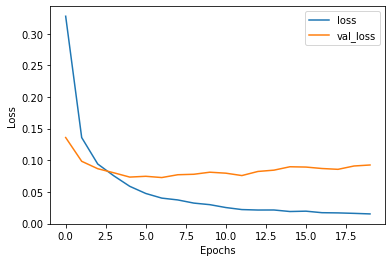

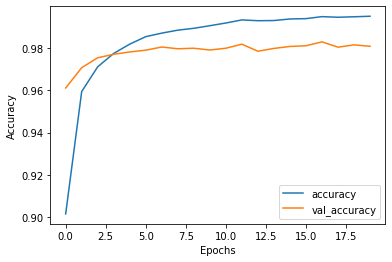

In [13]:

plot_history(network_history)

# **Evaluate accuracy**

In [24]:
# the accuracy on the test dataset is  less than the accuracy on the training dataset
test_loss, test_acc = ann.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9835

Test accuracy: 0.9835000038146973

Test loss: 0.07513734698295593


In [37]:
# with predict class we give testing set to model and request the output(for evaluation the model)
test_labels_p = ann.predict(test_images)
# convert to vector (find maximum index of each row ,axis =1 --> search in each row )
test_labels_p = np.argmax(test_labels_p ,axis =1)
print('Evaluation of test_data with model:',test_labels_p)
print('Our main test_data:',test_labels)

Evaluation of test_data with model: [7 2 1 ... 4 5 6]
The real test_data: [7 2 1 ... 4 5 6]


# **Implement the model**

**prediction the result of the Test set**

In [42]:
#Predict some images with the trained model
from tensorflow.keras import Sequential
probability_ann = Sequential([ann, tf.keras.layers.Softmax()])   
# prediction the Lable for each model in the testing set 
predictions = probability_ann.predict(test_images)
predictions[1]

array([0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

In [16]:
# finding the lable has the highest confidence value 
np.argmax(predictions[1])

2

In [17]:
# examining the text label to verify the correction of this classification
test_labels[1]

2

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img )
  plt.colorbar()

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# **Verify**

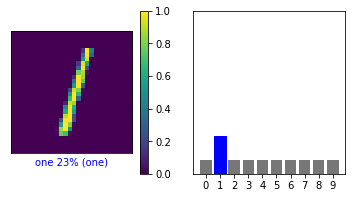

In [52]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# **Set of weights and biases**

In [0]:
train_steps=1000
learning_rate= 0.1

W = tf.Variable(tf.random.normal([784,10] , mean=0 , stddev=1.0 , dtype=np.float32))
b = tf.Variable(tf.random.normal([10], mean=0 , stddev =1.0 , dtype=np.float32))


In [54]:

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 12.629419326782227 Accuracy: 0.0625
Loss: 3.681633949279785 Accuracy: 0.4375
Loss: 2.2089834213256836 Accuracy: 0.609375
Loss: 2.129701614379883 Accuracy: 0.671875
Starting new epoch...
Loss: 1.8363089561462402 Accuracy: 0.625
Loss: 1.3764019012451172 Accuracy: 0.765625
Loss: 1.1334013938903809 Accuracy: 0.765625
Loss: 1.0260391235351562 Accuracy: 0.8125
Loss: 0.824105978012085 Accuracy: 0.796875
Starting new epoch...
Loss: 1.114713430404663 Accuracy: 0.8125


# **Testing**

In [55]:
test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.8047, shape=(), dtype=float32)


Loss: 2.4264602661132812 Accuracy: 0.0703125
Loss: 1.4738688468933105 Accuracy: 0.6328125
Starting new epoch...
Loss: 1.2234423160552979 Accuracy: 0.640625
Loss: 1.0520358085632324 Accuracy: 0.7734375
Loss: 1.0389138460159302 Accuracy: 0.7421875
Loss: 0.9897359013557434 Accuracy: 0.7890625
Loss: 0.9257757663726807 Accuracy: 0.7578125
Starting new epoch...
Loss: 0.916229248046875 Accuracy: 0.6875
Loss: 0.7785338759422302 Accuracy: 0.8046875
Loss: 0.8545128107070923 Accuracy: 0.7734375


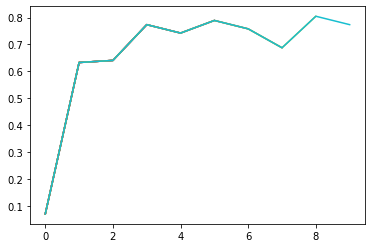

In [58]:
train_steps=1000
learning_rate= 0.1

W1 = tf.Variable(tf.random.normal([784,50] , mean=0 , stddev=0.1 , dtype=np.float32))
W2 = tf.Variable(tf.random.normal([50,10] , mean=0 , stddev=0.1 , dtype=np.float32))
b1 = tf.Variable(tf.random.normal([50], mean=0 , stddev =0.1 , dtype=np.float32))
b2 = tf.Variable(tf.random.normal([], mean=0 , stddev =0.1 , dtype=np.float32))

# training
accuracy=[]
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        with tf.GradientTape() as tape2:
            logits = tf.matmul(tf.nn.relu(tf.matmul(img_batch, W1) + b1),W2)+b2
            xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        grads2 = tape2.gradient(xent, [W2, b2])
    grads1 = tape.gradient(grads2, [W1, b1])

    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        accuracy.append(acc)
        print("Loss: {} Accuracy: {}".format(xent, acc))
        plt.plot(accuracy)